# Chat Analysis

In [1]:
import pandas as pd
import emoji
import regex
import re
import numpy as np
from collections import Counter
import plotly.express as px
import datetime
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
df = pd.read_csv('finalchat.csv')

# This function generates a list of emojis used in each message

In [3]:
def split_count(text):
    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)
    return emoji_list

df["emoji"] = df["message"].apply(split_count)

In [4]:
df['Messagecount'] = 1

In [5]:
df.head()

,id,date,from,message,reply_to_message_id,emoji,Messagecount
0,9799,2020-06-10 22:58:32,Dragon Master ( 1217107241 ),Make a random model and calc the rmse score th...,9796.0,[],1
1,9804,2020-06-10 23:05:42,Rohit Jain ( 1250027868 ),Hi all,NaN,[],1
2,9805,2020-06-10 23:07:36,Rohit Jain ( 1250027868 ),Ha my name is rohit jain and I joined your gro...,NaN,[],1
3,9809,2020-06-10 23:18:52,Mukul Sharma ( 1117859453 ),I'm working on a dataset where text and it's s...,NaN,[],1
4,9811,2020-06-10 23:19:46,Mukul Sharma ( 1117859453 ),Can anyone in the group help me out... I'm ha...,NaN,[],1


# Most Active People

In [6]:
df['from'].value_counts().head(10)

Krish Naik ( 935251183 )            414
Heman Parbhakar ( 1032615076 )      300
Gaurav Sahani ( 1010499401 )        180
Suchitra Majumdar ( 1118069939 )    161
Nilesh Verma ( 747148381 )          153
Rudransh Agnihotri ( 733538428 )    152
Bruh Chain ( 1053019232 )           151
Vinay Sawant ( 1125543854 )         140
Meet ( 996184127 )                  139
Alain[Kas] ( 416204971 )            135
Name: from, dtype: int64

# Get the total number of messages, emojis and links sent

In [7]:
emojis = sum(df['emoji'].str.len())
#print(emojis)
total_messages = df.shape[0]
#print(total_messages)
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)

print('Stats: ')
print("Messages:",total_messages)
print("Emojis:",emojis)
print("Links:",links)

Stats: 
Messages: 11766
Emojis: 1027
Links: 799


# Count the number of words , letters and emojis in each message

In [8]:
df['Letter_Count'] = df['message'].apply(lambda s : len(s))
df['Word_Count'] = df['message'].apply(lambda s : len(s.split(' ')))
df["emoji_count"]= df['emoji'].str.len()

# Generate stats for each user and store it in a csv file

In [9]:
#generate stats dataset for each user

l = df['from'].unique()
stats = list()

for i in range(len(l)):
    # Filtering out messages of particular user
    req_df= df[df["from"] == l[i]]
    # req_df will contain messages of only one particular user
    # shape will give the number of rows which indirectly means the number of messages
    message_sent = req_df.shape[0]
    #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
    words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
    # emojis conists of total emojis
    emojis = sum(req_df['emoji'].str.len())
    #links consist of total links
    links = sum(req_df["urlcount"])   
    #append teh data to stats list
    stats.append([l[i],message_sent,words_per_message,emojis,links])
    
stats_df = pd.DataFrame(stats,columns=['From','Messages_sent','Words_per_message','Emojis_sent','Links_sent'])
stats_df.to_csv('stats.csv',index=False)   

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning:

invalid value encountered in longlong_scalars



# Generate a dataframe for count of each emoji used and plot a pie chart

In [10]:
total_emojis_list = list([a for b in df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
emoji_df

,emoji,count
0,👍,221
1,😂,111
2,🙏,101
3,😊,90
4,👇,41
...,...,...
91,🥳,1
92,☝️,1
93,🤘,1
94,🤙,1


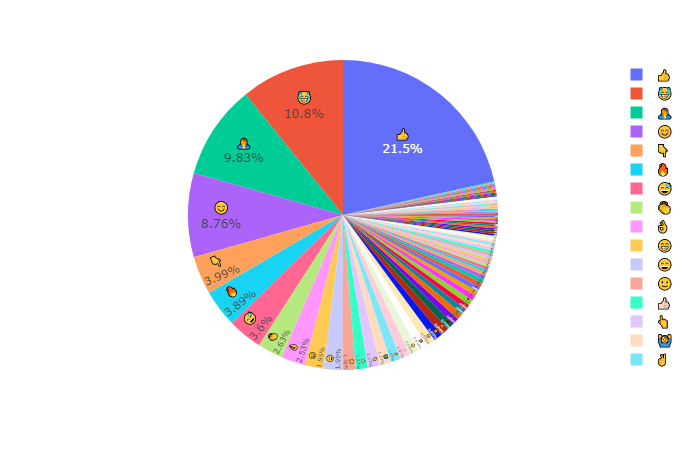

In [11]:
fig = px.pie(emoji_df, values='count', names='emoji')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show("png")

# Fetch the details of the most replied messages

In [12]:
#most replied messages
reply_list = list([a for a in df.reply_to_message_id ])
reply_dict = dict(Counter(reply_list))
reply_dict = sorted(reply_dict.items(), key=lambda x: x[1], reverse=True)


In [13]:
for i,j in reply_dict[:10]:
    #print(i,' ',j)
    for k in range(len(df)):
        if df.loc[k]['id'] == i:
            print(df.iloc[k][['from','message']],': ',j)

from                             Shivam Mittal ( 893629521 )
message    Hey anyone here interested in making good proj...
Name: 8189, dtype: object :  21
from                           Harit Shandilya ( 795826370 )
message     Hi Guys & Krish ,\n\nI've created this new we...
Name: 192, dtype: object :  7
from                                      Chan ( 817498399 )
message     I have created a chatbot,Which will give Info...
Name: 3261, dtype: object :  7
from                              Manu Rathore ( 910149217 )
message    Hey please i am in great depressed nowadays .....
Name: 6865, dtype: object :  7
from                                    Akash ( 1003506474 )
message     IoT based image recognition Attendance System...
Name: 1742, dtype: object :  6


Convert date column to datetime datatype

In [14]:
df.dtypes

id                       int64
date                    object
from                    object
message                 object
reply_to_message_id    float64
emoji                   object
Messagecount             int64
urlcount                 int64
Letter_Count             int64
Word_Count               int64
emoji_count              int64
dtype: object

In [15]:
df['date'] = df['date'].astype('datetime64[ns]')

# Get day wise statistics of messages sent

In [16]:
def f(i):
  l = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
  return l[i];
day_df=pd.DataFrame(df["message"])
day_df['day_of_date'] = df['date'].dt.weekday
day_df['day_of_date'] = day_df["day_of_date"].apply(f)
day_df["messagecount"] = 1
day = day_df.groupby("day_of_date").sum()
day.reset_index(inplace=True)

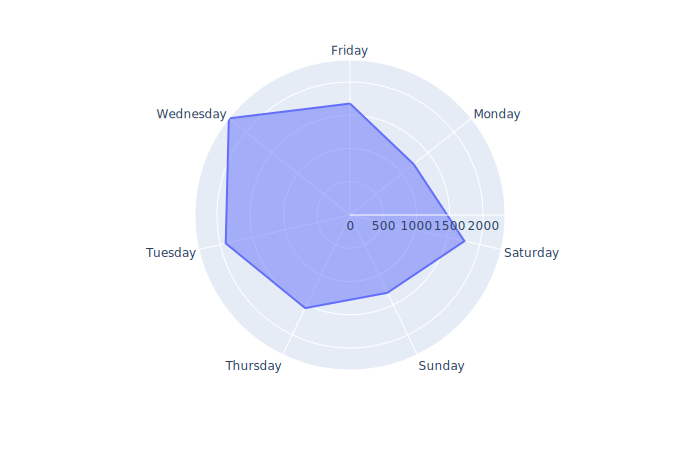

In [17]:
fig = px.line_polar(day, r='messagecount', theta='day_of_date', line_close=True)
fig.update_traces(fill='toself')
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
    )),
  showlegend=False
)
fig.show("svg")

# Get the most Active Time

Text(0, 0.5, 'Time')

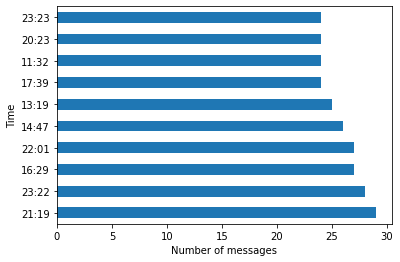

In [18]:
df['Time'] = [datetime.datetime.time(d).strftime('%H:%M') for d in df['date']] 
df['Time'].value_counts().head(10).plot.barh() # Top 10 Times of the day at which the most number of messages were sent
plt.xlabel('Number of messages')
plt.ylabel('Time')


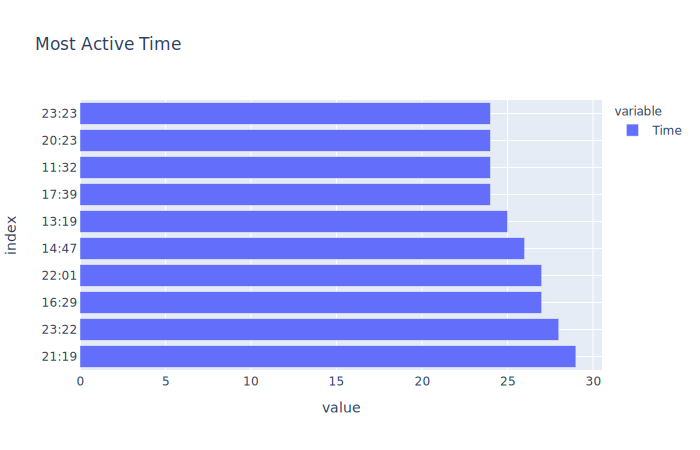

21:19    29
23:22    28
16:29    27
22:01    27
14:47    26
Name: Time, dtype: int64

In [19]:
df['Time'] = [datetime.datetime.time(d).strftime('%H:%M') for d in df['date']] 
data = df['Time'].value_counts().head(10) # Top 10 Times of the day at which the most number of messages were sent
fig = px.bar(data,orientation='h',title="Most Active Time")
fig.show("svg")

#plt.xlabel('Number of messages')
#plt.ylabel('Time')
data.head()

# Get the most Active Days

Text(0, 0.5, 'Date')

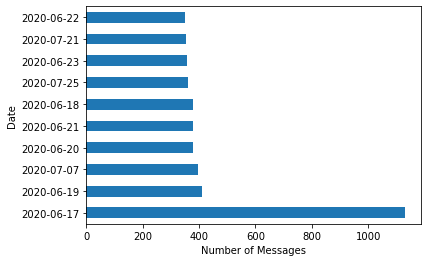

In [20]:
df['Date'] = [datetime.datetime.date(d) for d in df['date']] 
df['Date'].value_counts().head(10).plot.barh()
plt.xlabel('Number of Messages')
plt.ylabel('Date')

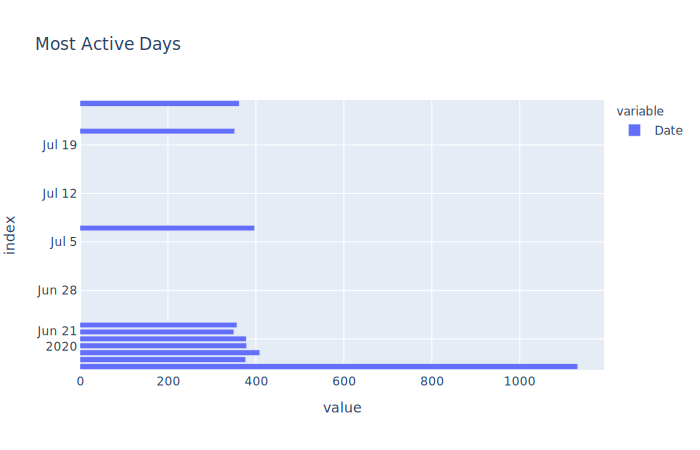

In [21]:
df['Date'] = [datetime.datetime.date(d) for d in df['date']] 
data = df['Date'].value_counts().head(10)
fig = px.bar(data, orientation='h',title="Most Active Days")

fig.show("svg")

# Longest Message

In [22]:
#highest words wala
df.iloc[df['Word_Count'].argmax()][['id','date','from','message']]

id                                                     20741
date                                     2020-07-03 17:56:33
from                        Suchitra Majumdar ( 1118069939 )
message    Training Executive (Demo Profile – HR/Training...
Name: 6543, dtype: object

In [23]:
print(df.loc[df['Word_Count'].argmax()][['message']])

message    Training Executive (Demo Profile – HR/Training...
Name: 6543, dtype: object


# Total words

In [24]:
text = " ".join(review for review in df.message)
print ("There are {} words in all the messages.".format(len(text)))

There are 795837 words in all the messages.


# Generate word cloud of the chat

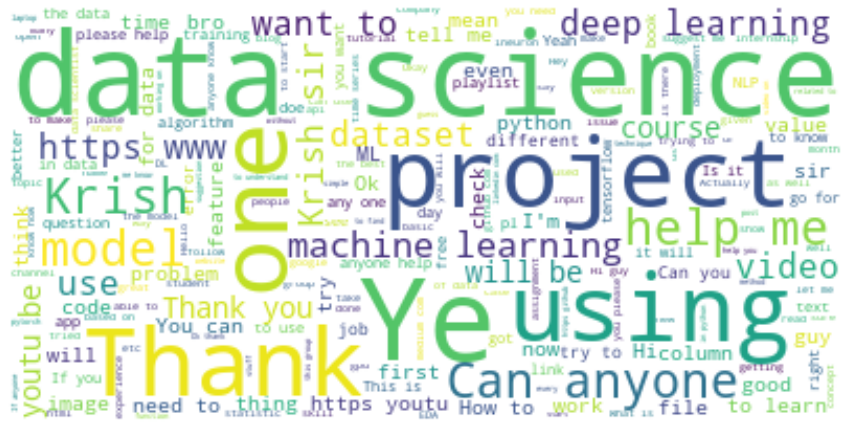

In [25]:
stopwords = set(STOPWORDS)
stopwords.update(["ra", "ga", "na", "ani", "em", "ki", "ah","ha","la","eh","ne","le","ni","lo","Ma","Haa","ni"])
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Word cloud for Krish Sir's Messages

From :  Krish Naik ( 935251183 )


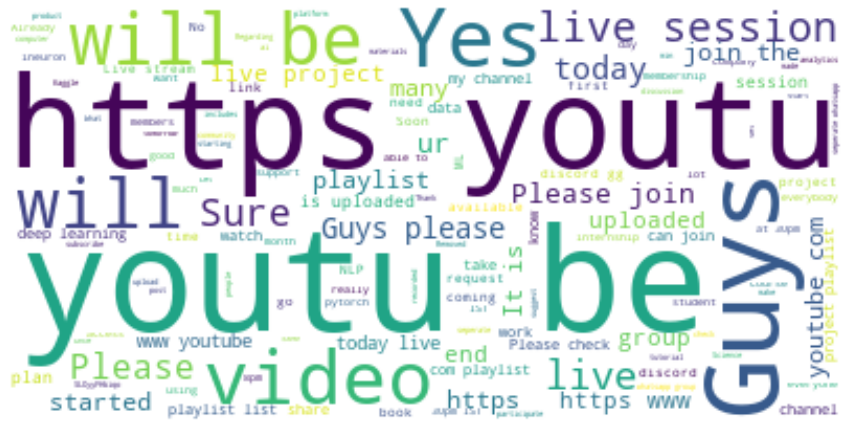

In [26]:
#Krish sir's Word cloud
l = df['from'].unique()[4:5]
for i in range(len(l)):
    dummy_df = df[df['from'] == l[i]]
    text = " ".join(review for review in dummy_df.message)
    stopwords = set(STOPWORDS)
    stopwords.update(["ra", "ga", "na", "ani", "em", "ki", "ah","ha","anta","kuda","ante","la","eh","Nen","ne","haa","Haa","le"])
    # Generate a word cloud image
    print('From : ',l[i])
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
    # Display the generated image:
    # the matplotlib way:  
    plt.figure( figsize=(15,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()